# Assignment 2
# Question 1

- Prove that Zipf's law works in Natural Language or not
- Zipf's law : r * freq = A * N
where r = word rank ; freq = word frequency ; A = constant ; N = Total number of words in collection

In [46]:
import nltk.corpus             #Importing all required packages
import glob
import csv
import re
import math
import matplotlib.pyplot as plt
import numpy as np 

In [47]:
nltk.corpus.gutenberg.fileids()  #Accessing files in gutenberg package

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [49]:
filepath = nltk.data.find('corpora\gutenberg\shakespeare-caesar.txt')  #Accessing particular file(shakespeare-caesar) from
file = glob.glob(filepath)                                             #gutenberg package
for words in file:
    with open(words) as text:
        read_file = text.read()

In [50]:
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)',read_file )
total_words = len(words)
print(total_words)
temp = dict()
for x in words:
    if x not in temp:
        temp[x] = 1
    else:
        temp[x] += 1
list = sorted(temp.items(), key = lambda y : y[1] , reverse = True)
print('The list shows the words and their specific frequency as given : \n\n' + str(list))


16064
The list shows the words and their specific frequency as given : 

[('the', 502), ('and', 409), ('you', 342), ('not', 249), ('And', 218), ('that', 200), ('Caesar', 189), ('him', 165), ('Brutus', 161), ('Bru', 153), ('his', 150), ('this', 141), ('your', 137), ('with', 131), ('will', 129), ('haue', 128), ('for', 118), ('Cassi', 107), ('shall', 107), ('thou', 100), ('are', 96), ('all', 90), ('That', 89), ('Cassius', 85), ('then', 79), ('our', 79), ('The', 76), ('Antony', 75), ('But', 73), ('What', 70), ('but', 68), ('know', 66), ('did', 66), ('was', 64), ('Enter', 63), ('men', 62), ('them', 60), ('what', 59), ('man', 58), ('For', 58), ('their', 57), ('thee', 55), ('come', 50), ('good', 49), ('You', 49), ('Ant', 48), ('from', 46), ('thy', 46), ('day', 44), ('they', 44), ('Lord', 44), ('well', 43), ('let', 42), ('heere', 41), ('would', 40), ('Noble', 39), ('now', 39), ('selfe', 39), ('Caes', 39), ('Cask', 38), ('when', 38), ('Caesars', 38), ('should', 38), ('Rome', 38), ('Brut', 37), 

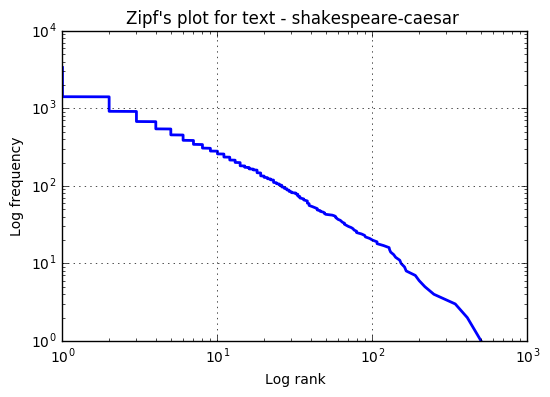

In [51]:
with open(('shakespeare-caesar.csv'), 'w', newline="") as newfile:
            newfile_ref = csv.writer(newfile)
            newfile_ref.writerow(['Word', 'Freq', 'Rank'])
            rank = 1
            for row in list:
                newfile_ref.writerow([row[0], row[1], rank])
                rank +=1
                newfile.close
newfile = open('shakespeare-caesar.csv', 'r')
words_r = []
freq_r = []
rank_r = []
new_csv = csv.reader(newfile)
for row in new_csv:
    words_r.append(row[0])
    freq_r.append(row[1])
    rank_r.append(row[2])
rank_r.pop(0)
freq_r.pop(0)
plt.loglog(freq_r,rank_r,color='b',linewidth=2)
plt.grid(True)
plt.title("Zipf's plot for text - shakespeare-caesar ")
plt.xlabel("Log rank")
plt.ylabel("Log frequency")
plt.show()